### Trobem una funció que ens aproximi la temperatura per treballar el problema

Considerem una llista de les temperatures a Manhattan entre el 19 d'octubre i 25 d'octubre

In [1]:
hores=[0, 3, 6, 9, 12, 15, 18, 21, 24]

In [2]:
T19O=[7,7,6,5,5,5,5,5,6,6,7,8,9,9,11,13,14,13,12,11,10,10,10,9,8]
T20O=[8,8,7,7,5,5,6,6,7,8,9,9,10,11,13,14,14,13,12,11,10,10,8,8,7]
T21O=[8,7,6,6,5,4,5,5,7,8,8,10,10,12,14,15,13,11,11,11,10,9,9,7,6]
T22O=[6,7,8,7,6,5,5,6,7,8,9,9,10,11,14,14,15,14,12,11,10,9,7,6,6]
T23O=[6,6,5,5,4,6,6,7,8,8,9,10,11,12,13,15,15,14,13,12,10,9,8,7,7]
T24O=[7,7,6,6,4,5,6,6,7,8,9,10,11,12,14,14,14,13,12,11,9,9,8,8,8]
T25O=[8,8,7,7,5,5,6,6,7,8,9,9,10,11,13,14,14,13,12,11,10,10,8,8,7]

Notem que les temperatures durant aquesta setmana creixen considerablement per tant la funció no quedarà exactament periòdica el que pot provocar alguna irregulatirar a l'aproximació

In [3]:
Temperatura7Dies=T19O+T20O+T21O+T22O+T23O+T24O+T25O
Temperatures=points([i,Temperatura7Dies[i]] for i in range(0, len(Temperatura7Dies)))

Calculem la màxima i la mínima per fer la aproximació amb la funció següent

$$T_e(t)=\frac{T_{max}-T_{min}}{2}+\frac{T_{max}+T_{min}}{2}sin(\omega(t-\varphi))$$

on $\omega$ i $\varphi$ les determinarem per quadrar el millor possible amb les temperatures. Com considerem les temperatures per hores, pendrem $t$ en hores i per tant $\omega=\frac{2\cdot \pi}{T}$ on $T=24$ doncs prenem un període de 24 hores.  Fixarem la $\varphi=$  (s'ha fet a posteriori per tal de tenir les mínimes temperatures sobre les 5h de la matinada i les màximes a les 15h

El nostre objectiu es trobar $k$, el coeficient de transferència tèrmica

#### Cerquem primerament les temperatures mínimes i màximes

In [4]:
Tmin=min(Temperatura7Dies); print('La temperatujra mínima es', Tmin, 'graus')
Tmax=max(Temperatura7Dies);print('La temperatura màxima es', Tmax, 'graus')

La temperatujra mínima es 4 graus
La temperatura màxima es 15 graus


Veiem com aproxima la funció $T_e(t)$ a les temperatures d'una setmana

En primer lloc, cal cercar $\varphi$, fixem en un primer moment $\varphi=10$ per veure una primera visió de l'aproximació de la gràfica, que deixaria les temperatures més fredes sobre les 3 i les 5 de la matinada i posteriorment trobem el que ens interessa.

In [5]:
T_aprox_ext(t)=(Tmax+Tmin)/2+((Tmax-Tmin)/2)*sin((2*pi/24)*(t-10))
AproxTemp= plot(T_aprox_ext, t, 0, len(Temperatura7Dies), color="orange")

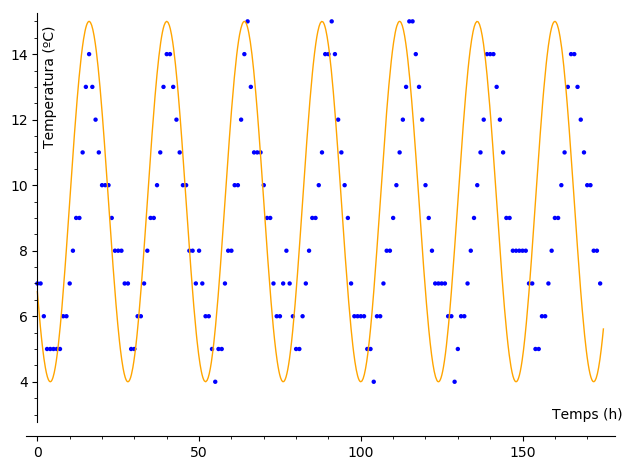

In [6]:
Ordenades=text("Temperatura (ºC)",(4,13),rotation=90.0,color='black')
Abcisses=text("Temps (h)",(170,3),color='black')
Temperatures+AproxTemp+Ordenades+Abcisses

La funció aproxima prou bé les temperatures però volem demanar que tant a l'inici  com al final del dia sigui la mateixa i estigui amb una temperatura inicial de 7 graus (es la que més es repeteix).
Notem que:

In [7]:
T_aprox_ext(0).n()

6.75000000000000

Busquem a quina hora s'ajusta 

In [8]:
Tini=solve(((7-(Tmax+Tmin)/2)/((Tmax-Tmin)/2))==sin(pi*x/12), x)
Tini[0].rhs()

-12*arcsin(5/11)/pi

Per tant definim $\varphi$=$-12*arcsin(5/11)/\pi$ i la nostra funció d'aproximació de temperatura serà:

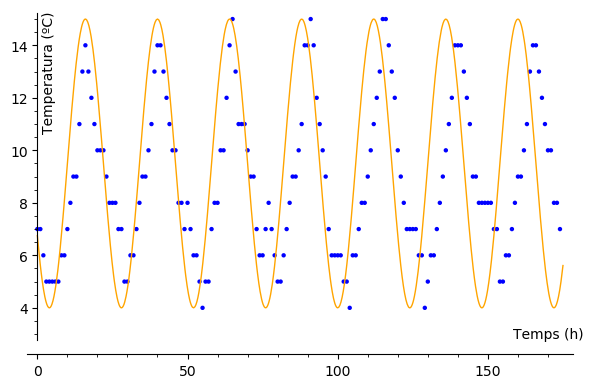

In [10]:
T_e(t)=(Tmax+Tmin)/2+((Tmax-Tmin)/2)*sin((2*pi/24)*(t-Tini[0].rhs()))
Temp= plot(T_e, t, 0, len(Temperatura7Dies), color="red")
Temperatures+AproxTemp+Ordenades+Abcisses

### Ara tractem de cercar una k amb la que treballar

Suposem en un primer moment que no tenim cap font de fred, el sistema a considerar seria 

$$T'(t)=-k(T_i-T_{e}(t))$$

Per tal de trobar una "k" que ens ajusti bé el problema, el resoldrem per diferents valors de k i veure una aproximació de com evolucionen les temperatures, ja que, la k depèn de com es el material com està contruit l'habitat i no el coneixem. Ti serà a temperatura a l'interior de l'habitat.
Ho farem per al primer dia.

In [ ]:
T_i=function("T_i")(t) 

In [ ]:
Aprx1=desolve(diff(T_i(t),t)==-0.05*(T_i(t)-T_e(t)),[T_i,t],[0,7])
Aprx2=desolve(diff(T_i(t),t)==-0.1*(T_i(t)-T_e(t)),[T_i,t],[0,7])
Aprx3=desolve(diff(T_i(t),t)==-0.01*(T_i(t)-T_e(t)),[T_i,t],[0,7])
Aprx4=desolve(diff(T_i(t),t)==-0.25*(T_i(t)-T_e(t)),[T_i,t],[0,7])
Aprx5=desolve(diff(T_i(t),t)==-0.5*(T_i(t)-T_e(t)),[T_i,t],[0,7])

In [ ]:
FAprx1=plot(Aprx1, t, 0, 24, color='red'); Llegenda1=text("T_i(t), k=0,05 ºC/h",(20,17),color='red')
FAprx2=plot(Aprx2, t, 0, 24, color='blue'); Llegenda2=text("T_i(t), k=0,1 ºC/h",(20,16),color='blue')
FAprx3=plot(Aprx3, t, 0, 24, color='orange'); Llegenda3=text("T_i(t), k=0,01 ºC/h",(20,15),color='orange')
FAprx4=plot(Aprx4, t, 0, 24, color='black'); Llegenda4=text("T_i(t),k=0,25ºC/h",(20,14),color='black')
FAprx5=plot(Aprx5, t, 0, 24, color='yellow'); Llegenda5=text("T_i(t), k=0,5 ºC/h",(20,13),color='yellow')
Abcisses2=text("Temps (h)",(23,3),color='black')
Ordenades2=text("Temperatura (ºC)",(0.5,13),rotation=90.0,color='black')
FAprx1+Llegenda1+FAprx2+Llegenda2+FAprx3+Llegenda3+FAprx4+Llegenda4+FAprx5+Llegenda5+Ordenades2+Abcisses2

Notem que estem parlant d'un habitat de Pingüins, per tant, no tindria gaire sentit considerar una $k$ força alta doncs, si no es perderien les temperatures, les quals ens interesa que sempre es mantinguin baixes (al voltant d'1ºC). Per tant, considerarem que K= 0.1ºC/h -Segurament en un habitat de Pingüins reals la $k$ és més baixa doncs no deuen variar gaire les temperatures al llarg del dia en funció de la de l'exterior, però per nosaltres poder modelitzar el problema en intervals de temps al llarg del dia, ens interessa que aquestes temperatures variin, per tant considerarem que tenim un habitat "no molt aïllant" i que per tant l'em d'anar refredant al llarg del dia" 
